# Resnet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction

**ResNet is a network structure proposed by the He Kaiming, Sun Jian and others of Microsoft Research Asia in 2015, and won the first place in the ILSVRC-2015 classification task. At the same time, it won the first place in ImageNet detection, ImageNet localization, COCO detection, and COCO segmentation tasks. It was a sensation at the time.**

ResNet, also known as residual neural network, refers to the idea of ​​adding residual learning to the traditional convolutional neural network, which solves the problem of gradient dispersion and accuracy degradation (training set) in deep networks, so that the network can get more and more The deeper, both the accuracy and the speed are controlled.

>Deep Residual Learning for Image Recognition Original link : <a href="https://arxiv.org/pdf/1512.03385.pdf" target="_blank">ResNet Paper</a>

**The problem caused by increasing depth**

* The first problem brought by increasing depth is the problem of gradient explosion / dissipation . This is because as the number of layers increases, the gradient of backpropagation in the network will become unstable with continuous multiplication, and become particularly large or special. small. Among them , the problem of gradient dissipation often occurs .

* In order to overcome gradient dissipation, many solutions have been devised, such as using BatchNorm, replacing the activation function with ReLu, using Xaiver initialization, etc. It can be said that gradient dissipation has been well solved

* Another problem of increasing depth is the problem of network degradation, that is, as the depth increases, the performance of the network will become worse and worse, which is directly reflected in the decrease in accuracy on the training set. The residual network article solves this problem. And after this problem is solved, the depth of the network has increased by several orders of magnitude.

**Degradation of deep network**

>With network depth increasing, accuracy gets saturated (which might be unsurprising) and then degrades rapidly. Unexpectedly, such degradation is not caused by overfitting, and adding more layers to a favored deep model leads to higher training error.

![residual](img/deg.jpg)

* The above figure is the error rate of the training set classified by the network on the CIFAR10-data set with the increase of the network depth . It can be seen that if we directly stack the convolutional layers, as the number of layers increases, the error rate increases significantly. The trend is that the deepest 56-layer network has the worst accuracy . We verified it on the VGG network. For the CIFAR-10 dataset, it took 5 minutes on the 18-layer VGG network to get the full network training. The 80% accuracy rate was achieved, and the 34-layer VGG model took 8 minutes to get the 72% accuracy rate. The problem of network degradation does exist.

* The decrease in the training set error rate indicates that the problem of degradation is not caused by overfitting. The specific reason is that it is left for further study. The author's other paper "Identity Mappings in Deep Residual Networks" proved the occurrence of degradation. It is because the optimization performance is not good, which indicates that the deeper the network, the more difficult the reverse gradient is to conduct.

### Deep Residual Networks

**From 10 to 100 layers**

We can imagine that *when we simply stack the network directly to a particularly long length, the internal characteristics of the network have reached the best situation in one of the layers. At this time, the remaining layers should not make any changes to the characteristics and learn automatically. The form of identity mapping*. That is to say, for a particularly deep deep network, the solution space of the shallow form of the network should be a subset of the solution space of the deep network, in other words, a network deeper than the shallow network will not have at least Worse effect, but this is not true because of network degradation.

Then, we settle for the second best. In the case of network degradation, if we do not add depth, we can improve the accuracy. Can we at least make the deep network achieve the same performance as the shallow network, that is, let the layers behind the deep network achieve at least The role of identity mapping . Based on this idea, the author proposes a residual module to help the network achieve identity mapping.

`To understand ResNet, we must first understand what kind of problems will occur when the network becomes deeper.` 

**The first problem brought by increasing the network depth is the disappearance and explosion of the gradient.**

This problem was successfully solved after Szegedy proposed the **BN (Batch Normalization)** structure. The BN layer can normalize the output of each layer. The size can still be kept stable after the reverse layer transfer, and it will not be too small or too large. 

**Is it easy to converge after adding BN and then increasing the depth?** 

The answer is still **negative**. The author mentioned the second problem-**the degradation problem**: when the level reaches a certain level, the accuracy will saturate and then decline rapidly. This decline is not caused by the disappearance of the gradient. It is not caused by overfit, but because the network is so complicated that it is difficult to achieve the ideal error rate by unconstrained stocking training alone. 

The degradation problem is not a problem of the network structure itself, but is caused by the current insufficient training methods. The currently widely used training methods, whether it is SGD, AdaGrad, or RMSProp, cannot reach the theoretically optimal convergence result after the network depth becomes larger. 

We can also prove that as long as there is an ideal training method, deeper networks will definitely perform better than shallow networks. 

*The proof process is also very simple*: `Suppose that several layers are added behind a network A to form a new network B. If the added level is just an identity mapping of the output of A, that is, the output of A is after the level of B becomes the output of B, there is no change, so the error rates of network A and network B are equal, which proves that the deepened network will not be worse than the network before deepening.`


He Kaiming proposed a residual structure to implement the above identity mapping (Below Figure): In addition to the normal convolution layer output, the entire module has a branch directly connecting the input to the output. The output and the output of the convolution do The final output is obtained by arithmetic addition. The formula is H (x) = F (x) + x, x is the input, F (x) is the output of the convolution branch, and H (x) is the output of the entire structure. It can be shown that if all parameters in the F (x) branch are 0, H (x) is an identity mapping. The residual structure artificially creates an identity map, which can make the entire structure converge in the direction of the identity map, ensuring that the final error rate will not become worse because the depth becomes larger. If a network can achieve the desired result by simply setting the parameter values by hand, then this structure can easily converge to the result through training. This is a rule that is unsuccessful when designing complex networks. Recall that in order to restore the original distribution after BN processing, the formula y = rx + delta is used. When r is manually set to standard deviation and delta is the mean, y is the distribution before BN processing. This is the use of this Rules.


![residual](img/residual.png)


#### What does residual learning mean?

The idea of residual learning is the above picture, which can be understood as a block, defined as follows:

![residual](img/resnet11.gif)


The residual learning block contains two branches or two mappings:

1. Identity mapping refers to the curved curve on the right side of the figure above. As its name implies, identity mapping refers to its own mapping, which is x itself;


2. *F*(x) Residual mapping refers to another branch, that is, part. This part is called residual mapping (y -x) .

**What role does the residual module play in back propagation?**

* The residual module will significantly reduce the parameter value in the module, so that the parameters in the network have a more sensitive response ability to the loss of reverse conduction, although the fundamental It does not solve the problem that the loss of backhaul is too small, but it reduces the parameters. Relatively speaking, it increases the effect of backhaul loss and also generates a certain regularization effect.

* Secondly, because there are branches of the identity mapping in the forward process, the gradient conduction in the back-propagation process also has more simple paths , and the gradient can be transmitted to the previous module after only one relu.

* The so-called backpropagation is that the network outputs a value, and then compares it with the real value to an error loss. At the same time, the loss is changed to change the parameter. The returned loss depends on the original loss and gradient. Since the purpose is to change the parameter, The problem is that if the intensity of changing the parameter is too small, the value of the parameter can be reduced, so that the loss of the intensity of changing the parameter is relatively greater.

* Therefore, the most important role of the residual module is to change the way of forward and backward information transmission, thereby greatly promoting the optimization of the network.

* Using the four criteria proposed by Inceptionv3, we will use them again to improve the residual module. Using criterion 3, the dimensionality reduction before spatial aggregation will not cause information loss, so the same method is also used here, adding 1 * 1 convolution The kernel is used to increase the non-linearity and reduce the depth of the output to reduce the computational cost. You get the form of a residual module that becomes a bottleneck. The figure above shows the basic form on the left and the bottleneck form on the right.

* To sum up, the shortcut module will help the features in the network perform identity mapping in the forward process, and help conduct gradients in the reverse process, so that deeper models can be successfully trained.


#### Why can the residual learning solve the problem of "the accuracy of the network deepening declines"?

For a neural network model, if the model is optimal, then training can easily optimize the residual mapping to 0, and only identity mapping is left at this time. No matter how you increase the depth, the network will always be in an optimal state in theory. Because it is equivalent to all the subsequent added networks to carry information transmission along the identity mapping (self), it can be understood that the number of layers behind the optimal network is discarded (without the ability to extract features), and it does not actually play a role. . In this way, the performance of the network will not decrease with increasing depth.




The author used two types of data, **ImageNet** and **CIFAR**, to prove the effectiveness of ResNet:

The first is ImageNet. The authors compared the training effect of ResNet structure and traditional structure with the same number of layers. The left side of Figure is a VGG-19 network with a traditional structure (each followed by BN), the middle is a 34-layer network with a traditional structure (each followed by BN), and the right side is 34 layers ResNet (the solid line indicates a direct connection, and the dashed line indicates a dimensional change using 1x1 convolution to match the number of features of the input and output). Figure 3 shows the results after training these types of networks. 


The data on the left shows that the 34-layer network (red line) with the traditional structure has a higher error rate than the VGG-19 (blue-green line). Because the BN structure is added to each layer Therefore, the high error is not caused by the gradient disappearing after the level is increased, but by the degradation problem; the ResNet structure on the right side of Figure 3 shows that the 34-layer network (red line) has a higher error rate than the 18-layer network (blue-green line). Low, this is because the ResNet structure has overcome the degradation problem. In addition, the final error rate of the ResNet 18-layer network on the right is similar to the error rate of the traditional 18-layer network on the left. This is because the 18-layer network is simpler and can converge to a more ideal result even without the ResNet structure.


![residual](img/resnetwork.png)


![residual](img/error.png)


The ResNet structure like the left side of Fig. 4 is only used for shallow ResNet networks. If there are many network layers, the dimensions near the output end of the network will be very large. Still using the structure on the left side of Fig. 4 will cause a huge amount of calculation. For deeper networks, we all use the bottleneck structure on the right side of Figure 4, first using a 1x1 convolution for dimensionality reduction, then 3x3 convolution, and finally using 1x1 dimensionality to restore the original dimension.

In practice, considering the cost of the calculation, the residual block is calculated and optimized, that is, the two 3x3 convolution layers are replaced with 1x1 + 3x3 + 1x1 , as shown below. The middle 3x3 convolutional layer in the new structure first reduces the calculation under one dimensionality-reduced 1x1 convolutional layer , and then restores it under another 1x1 convolutional layer , both maintaining accuracy and reducing the amount of calculation .

![residual](img/variant.png)


This is equivalent to reducing the amount of parameters for the same number of layers , so it can be extended to deeper models. So the author proposed ResNet with 50, 101 , and 152 layers , and not only did not have degradation problems, the error rate was greatly reduced, and the computational complexity was also kept at a very low level .

At this time, the error rate of ResNet has already dropped other networks a few streets, but it does not seem to be satisfied. Therefore, a more abnormal 1202 layer network has been built. For such a deep network, optimization is still not difficult, but it appears The problem of overfitting is quite normal. The author also said that the 1202 layer model will be further improved in the future.

**Diffrent Variants** : -

![residual](img/resnetnetwork.png)


Below is the transcript of resnet, winning the championship at ImageNet2015

![residual](img/resnetresults.png)


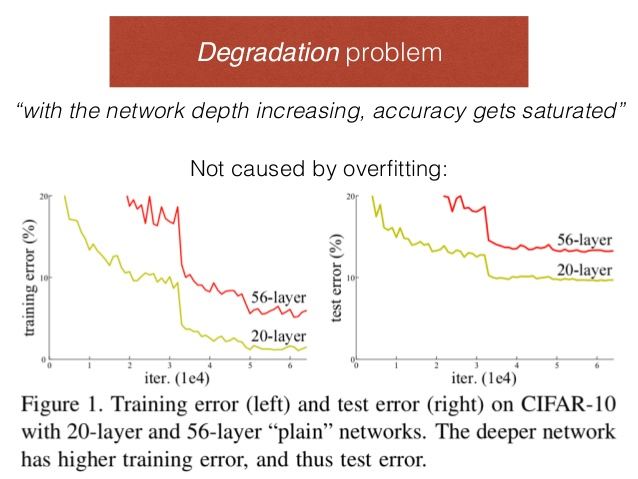

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/CNN_Architecture/img/deg.jpg')

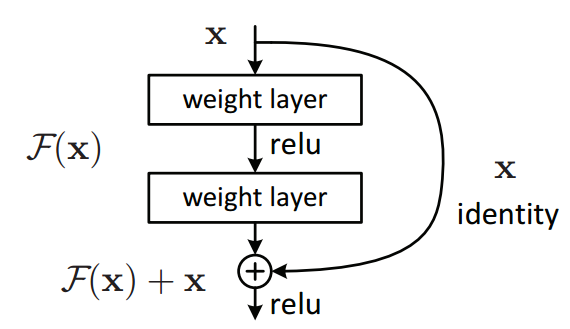

In [3]:
Image('/content/drive/MyDrive/CNN_Architecture/img/residual.png')

In [6]:
import ipywidgets as widgets
display(widgets.HTML('<img src="/content/drive/MyDrive/CNN_Architecture/img/resnet11.gif" width="750" align="center">'))

HTML(value='<img src="/content/drive/MyDrive/CNN_Architecture/img/resnet11.gif" width="750" align="center">')

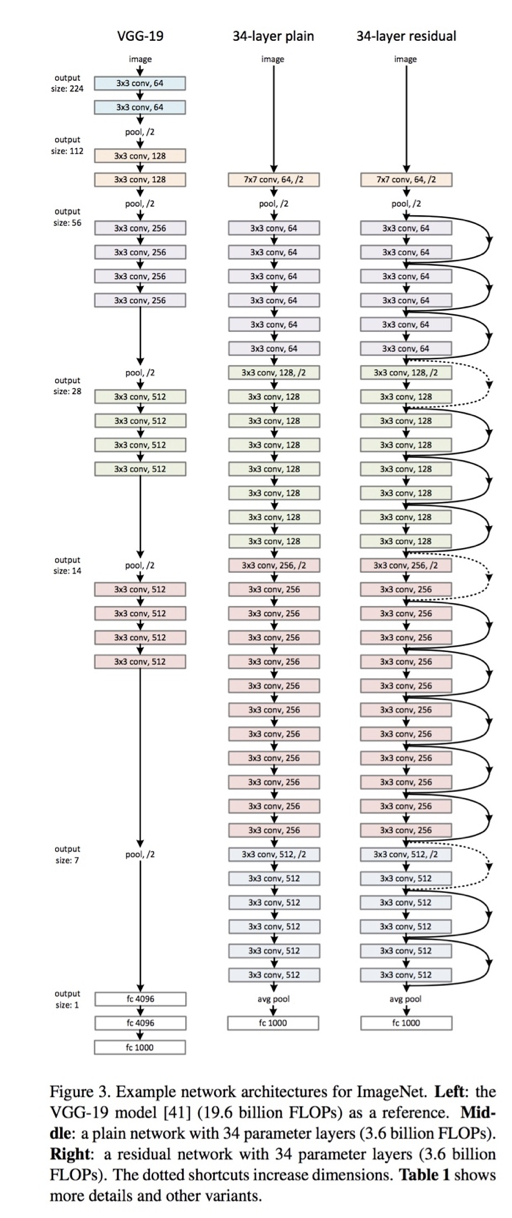

In [7]:
Image('/content/drive/MyDrive/CNN_Architecture/img/resnetwork.png')

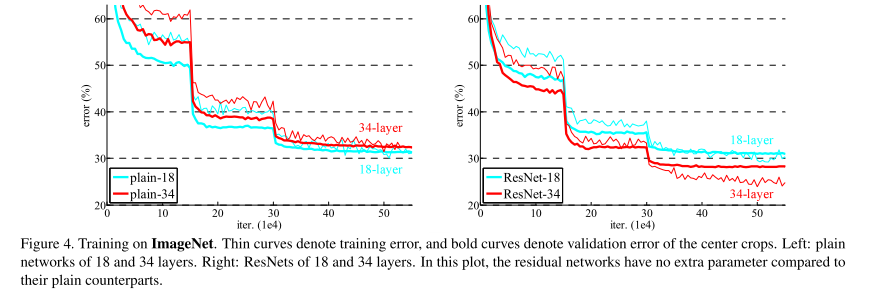

In [8]:
Image('/content/drive/MyDrive/CNN_Architecture/img/error.png')

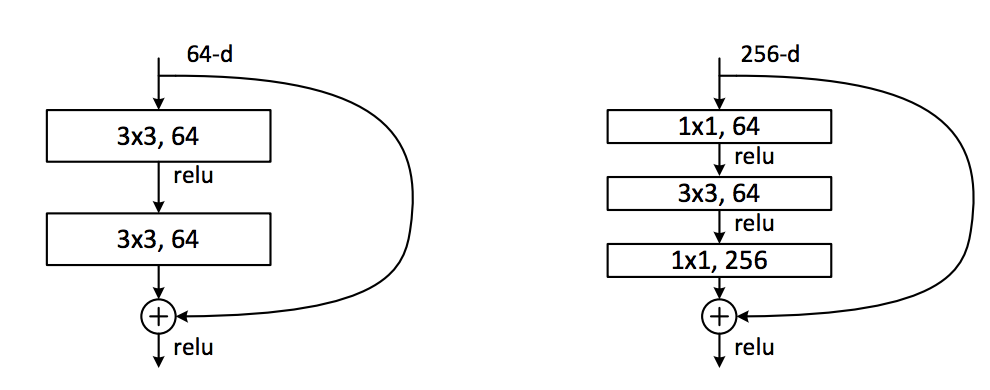

In [9]:
Image('/content/drive/MyDrive/CNN_Architecture/img/variant.png')

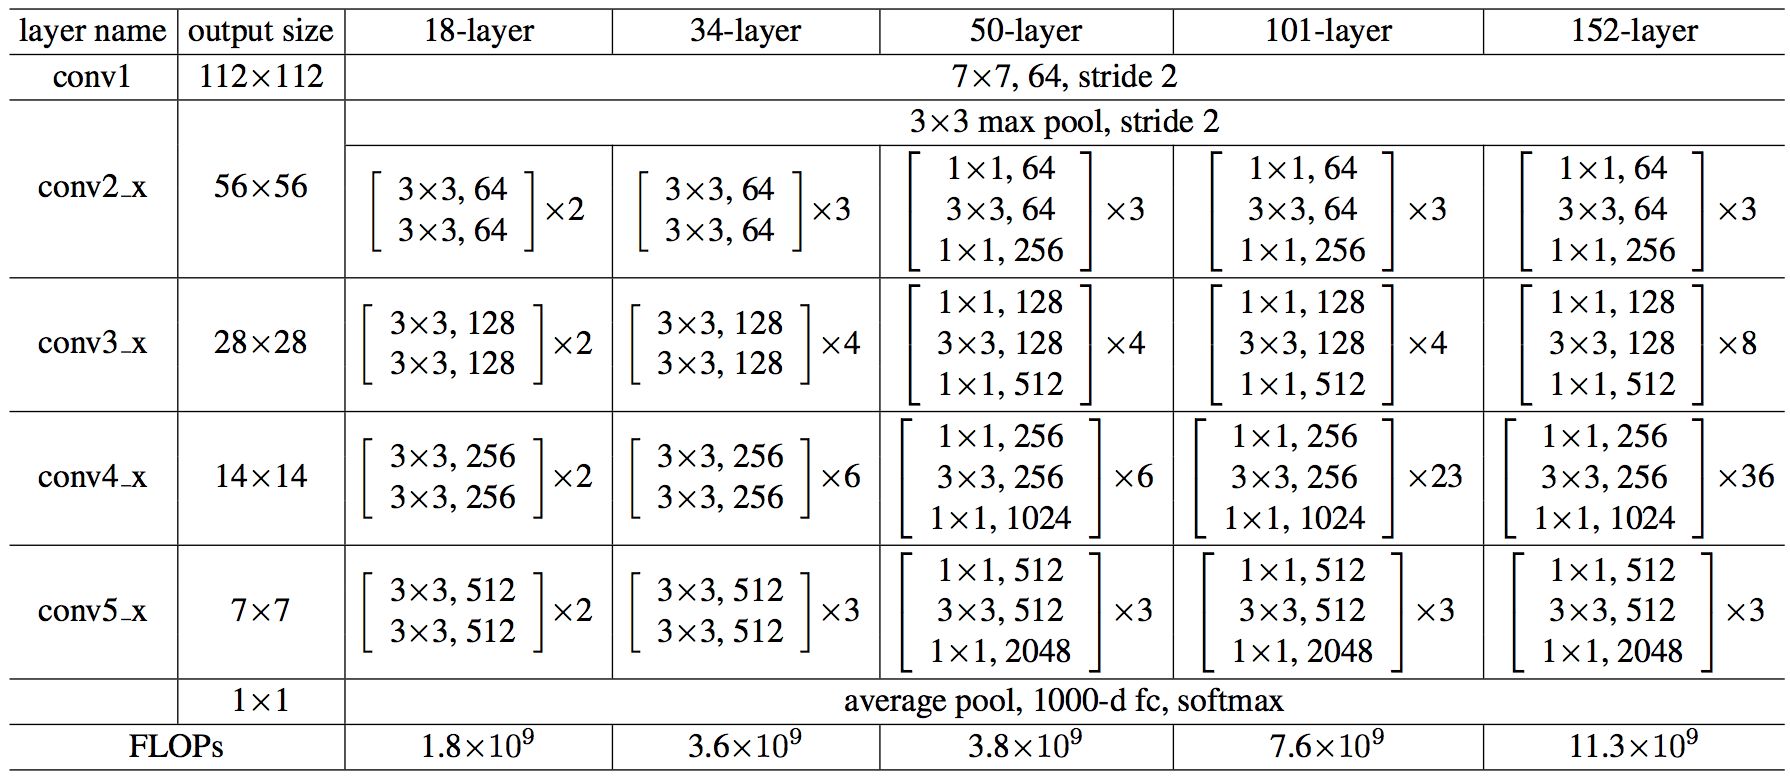

In [10]:
Image('/content/drive/MyDrive/CNN_Architecture/img/resnetnetwork.png')

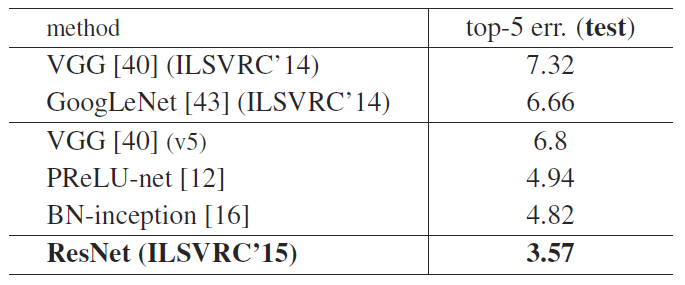

In [11]:
Image('/content/drive/MyDrive/CNN_Architecture/img/resnetresults.png')

### Code Implementation

In [ ]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar100
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
num_classes = 100
nb_epochs = 10

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#Pre-process the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
datagen.fit(x_train)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

model = Sequential()
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler

#checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
#                               verbose=1, save_best_only=True)
t=time.time()
#x_train.shape[0] // 64
historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=1),
                                  steps_per_epoch=1,
                                  epochs=1,
                                  validation_data=(x_test, y_test))
print('Training time: %s' % (t - time.time()))

AttributeError: 'Sequential' object has no attribute 'total_loss'